In [1]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
image_size = [224, 224]

In [3]:
vgg = VGG16(input_shape = image_size + [3], weights = 'imagenet', include_top =  False)

In [4]:
for layer in vgg.layers:
    layer.trainable = False

In [5]:
from glob import glob
folders = glob('hinh/train/*')

In [6]:
folders

['hinh/train\\apple',
 'hinh/train\\banana',
 'hinh/train\\beetroot',
 'hinh/train\\bell pepper',
 'hinh/train\\cabbage',
 'hinh/train\\capsicum',
 'hinh/train\\carrot',
 'hinh/train\\cauliflower',
 'hinh/train\\chilli pepper',
 'hinh/train\\corn',
 'hinh/train\\cucumber',
 'hinh/train\\eggplant',
 'hinh/train\\garlic',
 'hinh/train\\ginger',
 'hinh/train\\grapes',
 'hinh/train\\jalepeno',
 'hinh/train\\kiwi',
 'hinh/train\\lemon',
 'hinh/train\\lettuce',
 'hinh/train\\mango',
 'hinh/train\\onion',
 'hinh/train\\orange',
 'hinh/train\\paprika',
 'hinh/train\\pear',
 'hinh/train\\peas',
 'hinh/train\\pineapple',
 'hinh/train\\pomegranate',
 'hinh/train\\potato',
 'hinh/train\\raddish',
 'hinh/train\\soy beans',
 'hinh/train\\spinach',
 'hinh/train\\sweetcorn',
 'hinh/train\\sweetpotato',
 'hinh/train\\tomato',
 'hinh/train\\turnip',
 'hinh/train\\watermelon']

In [8]:
x = Flatten()(vgg.output)

In [9]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [10]:
model = Model(inputs = vgg.input, outputs = prediction)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_data_gen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [15]:
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [16]:
train_set = train_data_gen.flow_from_directory('hinh/train/', target_size = (224,224), batch_size = 32, class_mode = 'categorical')

Found 3077 images belonging to 36 classes.


In [17]:
test_set = test_data_gen.flow_from_directory('hinh/validation/', target_size = (224,224), batch_size = 32, class_mode = 'categorical')

Found 351 images belonging to 36 classes.


In [18]:
class_names = list(test_set.class_indices.keys())
print(class_names)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [19]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("vgg16.h5", save_best_only=True)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",patience=5, restore_best_weights=True
)

In [20]:
mod = model.fit(train_set, epochs=100, validation_data=test_set,callbacks=[checkpoint_callback,early_stopping_callback])

Epoch 1/100
 6/97 [>.............................] - ETA: 12:20 - loss: 5.1245 - accuracy: 0.0625

C:\Users\OS\anaconda3\envs\NLN\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


97/97 [==============================] - 716s 7s/step - loss: 2.6090 - accuracy: 0.3760 - val_loss: 0.7142 - val_accuracy: 0.8177
Epoch 2/100
97/97 [==============================] - 696s 7s/step - loss: 1.1212 - accuracy: 0.6874 - val_loss: 0.5819 - val_accuracy: 0.8575
Epoch 3/100
97/97 [==============================] - 685s 7s/step - loss: 0.7431 - accuracy: 0.7836 - val_loss: 0.2681 - val_accuracy: 0.9231
Epoch 4/100
97/97 [==============================] - 683s 7s/step - loss: 0.5673 - accuracy: 0.8388 - val_loss: 0.3259 - val_accuracy: 0.9202
Epoch 5/100
97/97 [==============================] - 686s 7s/step - loss: 0.4078 - accuracy: 0.8820 - val_loss: 0.2359 - val_accuracy: 0.9402
Epoch 6/100
97/97 [==============================] - 688s 7s/step - loss: 0.3298 - accuracy: 0.9074 - val_loss: 0.3218 - val_accuracy: 0.9145
Epoch 7/100
97/97 [==============================] - 686s 7s/step - loss: 0.2333 - accuracy: 0.9353 - val_loss: 0.2116 - val_accuracy: 0.9487
Epoch 8/100
97/97 

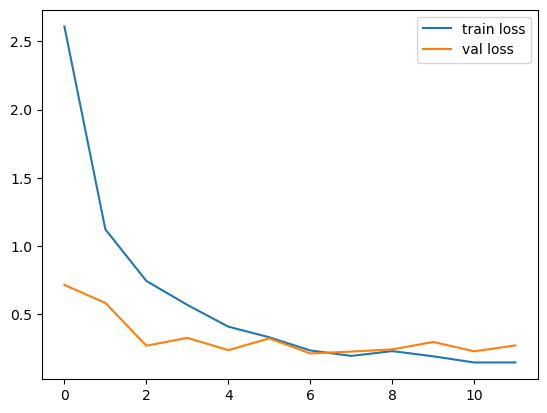

In [21]:
import matplotlib.pyplot as plt
plt.plot(mod.history['loss'], label='train loss')
plt.plot(mod.history['val_loss'], label='val loss')
plt.legend()
plt.show()

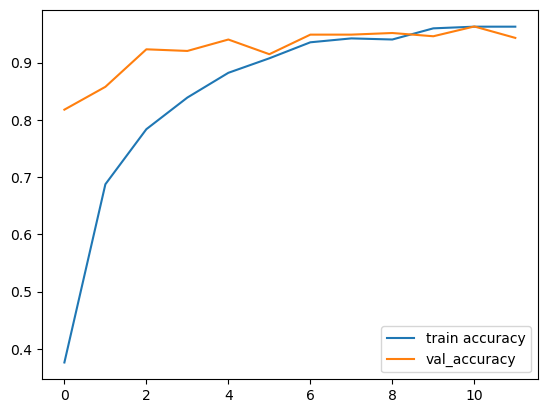

In [22]:
plt.plot(mod.history['accuracy'], label='train accuracy')
plt.plot(mod.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [23]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('vgg16.h5')

In [24]:
test_loss, test_accuracy = model.evaluate(test_set)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

11/11 [==============================] - 66s 6s/step - loss: 0.2116 - accuracy: 0.9487
Test loss: 0.2116440385580063
Test accuracy: 0.9487179517745972
